In [1]:
# ==========================
# Mount Google Drive
# ==========================
from google.colab import drive
import os

drive.mount('/content/drive')

# ==========================
# Set Base Path
# ==========================
base_path = "/content/drive/MyDrive/Healthcare_EDA_Projects"

# Project name
project_name = "titanic"

# Full path for this project
project_path = os.path.join(base_path, project_name)

# Folder paths
raw_path = os.path.join(project_path, "data", "raw")
processed_path = os.path.join(project_path, "data", "processed")
notebooks_path = os.path.join(project_path, "notebooks")
reports_path = os.path.join(project_path, "reports")
figures_path = os.path.join(reports_path, "figures")

# ==========================
# Create Folders
# ==========================
folders = [raw_path, processed_path, notebooks_path, reports_path, figures_path]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# ==========================
# Create Empty Files
# ==========================
files = [
    os.path.join(reports_path, "README.md"),
    os.path.join(project_path, "requirements.txt"),
    os.path.join(project_path, "LICENSE"),
    os.path.join(project_path, ".gitignore"),
    os.path.join(project_path, "README.md")
]
for file in files:
    open(file, 'a').close()

print(f"✅ Project structure created at: {project_path}")


Mounted at /content/drive
✅ Project structure created at: /content/drive/MyDrive/Healthcare_EDA_Projects/titanic


In [ ]:
# =========================
# 📌 Project: Titanic EDA
# =========================

In [2]:
# ========================
# Setup & Imports
# ========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set(style="whitegrid")

In [4]:
# ========================
# Load Dataset
# ========================
# Upload manually
from google.colab import files
uploaded = files.upload()  # Upload titanic.csv here

# Save raw data
df_raw = pd.read_csv("titanic.csv")
df_raw.to_csv(os.path.join(raw_path, "titanic.csv"), index=False)  # Save to Drive

print("\n--- First 5 rows ---\n")
print(df_raw.head())

Saving titanic.csv to titanic (1).csv

--- First 5 rows ---

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
# ========================
# Basic Info & Summary
# ========================
print("\n--- Dataset Info ---\n")
df_raw.info()
print("\n--- Summary Stats ---\n")
print(df_raw.describe())


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB

--- Summary Stats ---

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
st

In [7]:
print("--- Before Cleaning ---")
print(df_raw.info())
print("\nMissing values before cleaning:\n", df_raw.isnull().sum())

--- Before Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Missing values before cleaning:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
# Fill missing values for Age, Fare and Embarked
df_raw['Age'].fillna(df_raw['Age'].median(), inplace=True)
df_raw['Fare'].fillna(df_raw['Fare'].median(), inplace=True)
df_raw['Embarked'].fillna(df_raw['Embarked'].mode()[0], inplace=True)

In [12]:
# Drop 'Cabin' due to too many missing values
df_raw.drop(columns=['Cabin'], inplace=True)

In [15]:
# Create 'FamilySize' = SibSp + Parch + 1
df_raw['FamilySize'] = df_raw['SibSp'] + df_raw['Parch'] + 1

# Create 'IsAlone' feature
df_raw['IsAlone'] = 1  # default
df_raw.loc[df_raw['FamilySize'] > 1, 'IsAlone'] = 0

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply encoding only to columns that exist
categorical_cols = [col for col in ['Sex', 'Embarked'] if col in df_raw.columns]
for col in categorical_cols:
    df_raw[col] = le.fit_transform(df_raw[col])

# Drop irrelevant columns only if they exist
columns_to_drop = [col for col in ['Name', 'Ticket'] if col in df_raw.columns]
df_raw.drop(columns=columns_to_drop, inplace=True)

# Final check
print("✅ Data cleaned successfully!")
print("Columns after cleaning:\n", df_raw.columns)

✅ Data cleaned successfully!
Columns after cleaning:
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title'],
      dtype='object')


In [16]:
print("\n--- After Cleaning ---")
print(df_raw.info())
print("\nMissing values after cleaning:\n", df_raw.isnull().sum())


--- After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   FamilySize   418 non-null    int64  
 9   IsAlone      418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.1 KB
None

Missing values after cleaning:
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
dtype: int64


In [17]:
df_processed = df_raw.copy()

# Quick summary of our cleaned data
print(df_processed.info())

# Save processed data to Drive
df_processed.to_csv(os.path.join(processed_path, "titanic_processed.csv"), index=False)

print(f"✅ Processed data saved to: {os.path.join(processed_path, 'titanic_processed.csv')}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   FamilySize   418 non-null    int64  
 9   IsAlone      418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.1 KB
None
✅ Processed data saved to: /content/drive/MyDrive/Healthcare_EDA_Projects/titanic/data/processed/titanic_processed.csv


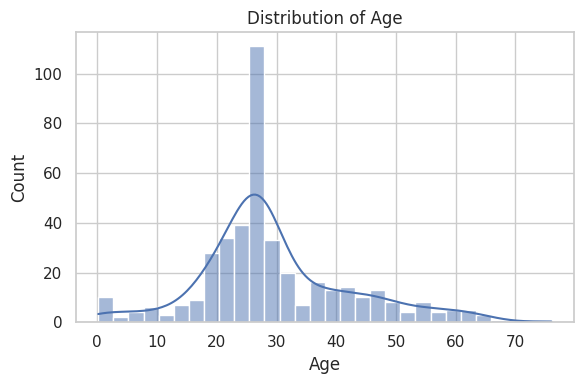

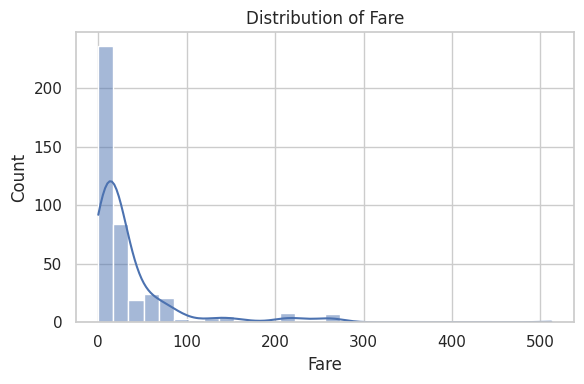

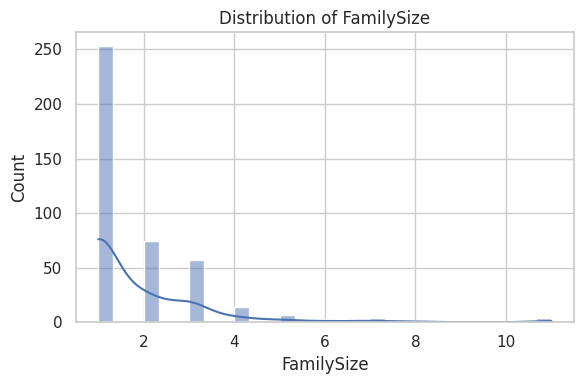

In [18]:
num_cols = ['Age', 'Fare', 'FamilySize']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_processed[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.savefig(os.path.join(figures_path, "Distribution of Age, Fare and FamilySize.png"))
    plt.tight_layout()
    plt.show()
    plt.close()

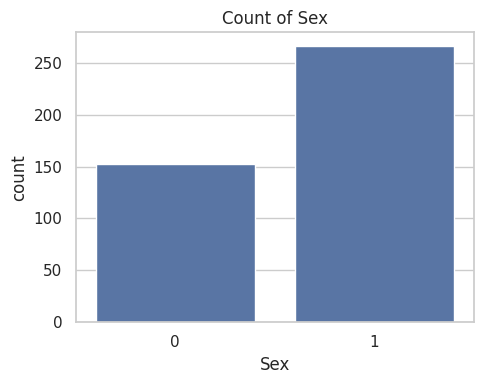

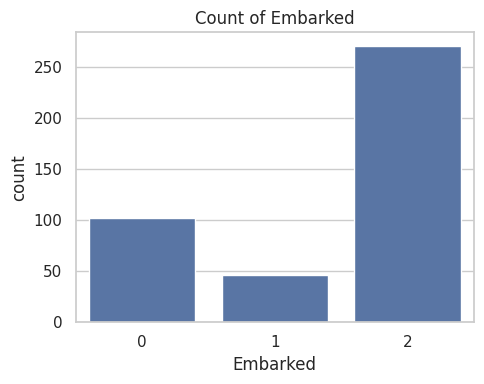

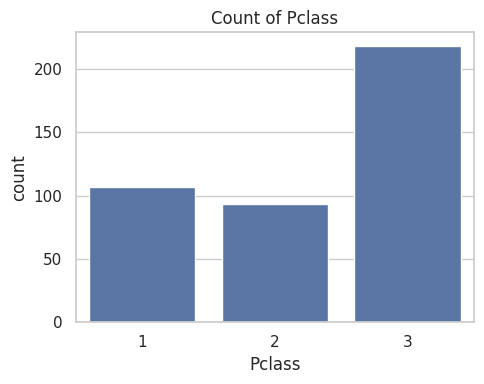

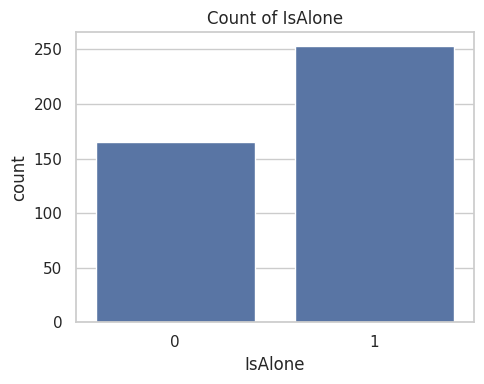

In [19]:
cat_cols = ['Sex', 'Embarked', 'Pclass', 'IsAlone']

for col in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df_processed, x=col)
    plt.title(f'Count of {col}')
    plt.savefig(os.path.join(figures_path, "Count of Sex, Embarked, Pclass and IsAlone.png"))
    plt.tight_layout()
    plt.show()
    plt.close()

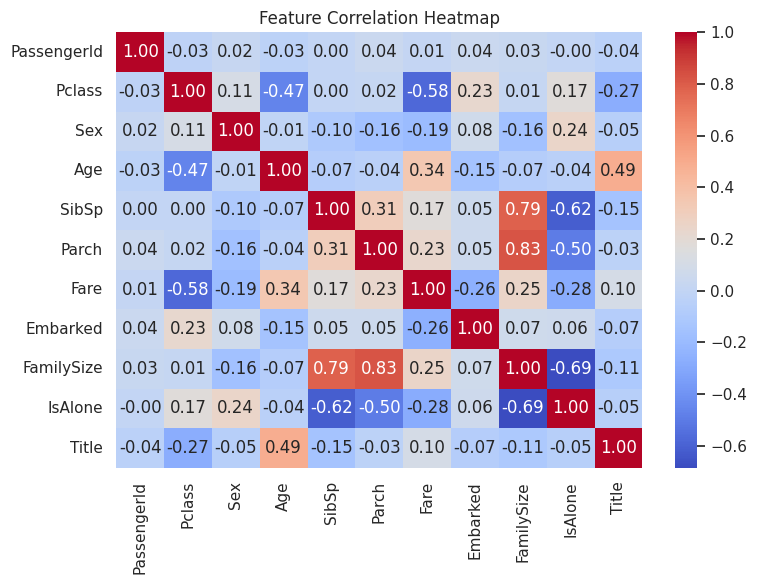

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig(os.path.join(figures_path, "Feature Correlation Heatmap.png"))
plt.tight_layout()
plt.show()
plt.close()

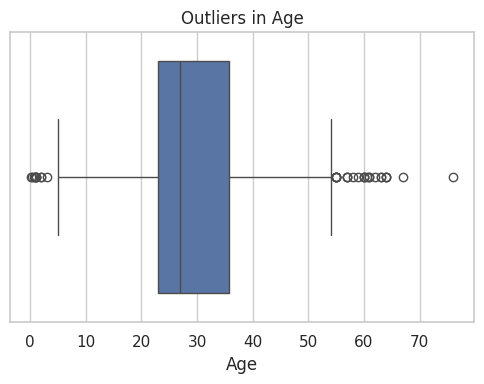

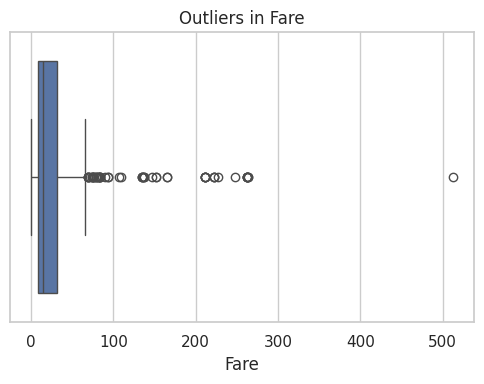

In [22]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df_processed[col])
    plt.title(f'Outliers in {col}')
    plt.savefig(os.path.join(figures_path, "Outliers in Age and Fare.png"))
    plt.tight_layout()
    plt.show()
    plt.close()